<a href="https://colab.research.google.com/github/eridanletalis/probability_and_statistics/blob/master/prob_hw_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy

Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

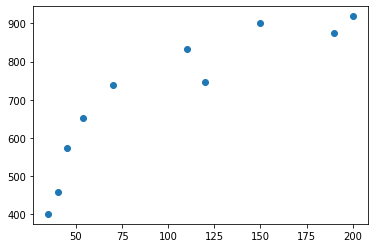

In [8]:
plt.scatter(zp, ks, )

Расчёты вручную.

In [31]:
#x-x_mean; y-y_mean
x1 = zp.copy()
y1 = ks.copy()
x2 = x1 - x1.mean()
y2 = y1 - y1.mean()
z = x2 * y2
x3 = x2**2
y3 = y2**2

In [39]:
#Дисперсии для знаменателя
D_x = x3.mean()
D_y = y3.mean()
D_x

3494.6400000000003

In [40]:
D_y

30468.890000000007

In [47]:
# Ковариация
covar = z.mean()
covar

9157.84

In [46]:
np.cov(x1, y1, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [48]:
r_ = covar / (D_x * D_y) ** 0.5
r_

0.8874900920739162

In [34]:
data = {'X': x1, 'Y': y1, 'X-X_mean': x2, 'Y-Y_mean': y2,
        '(X-X_mean) * (Y-Y_mean)': z, 'X^2': x3, 'Y^2': y3}

In [36]:
df = pd.DataFrame(data)
df

,X,Y,X-X_mean,Y-Y_mean,(X-X_mean) * (Y-Y_mean),X^2,Y^2
0,35,401,-66.4,-308.9,20510.96,4408.96,95419.21
1,45,574,-56.4,-135.9,7664.76,3180.96,18468.81
2,190,874,88.6,164.1,14539.26,7849.96,26928.81
3,200,919,98.6,209.1,20617.26,9721.96,43722.81
4,40,459,-61.4,-250.9,15405.26,3769.96,62950.81
5,70,739,-31.4,29.1,-913.74,985.96,846.81
6,54,653,-47.4,-56.9,2697.06,2246.76,3237.61
7,150,902,48.6,192.1,9336.06,2361.96,36902.41
8,120,746,18.6,36.1,671.46,345.96,1303.21
9,110,832,8.6,122.1,1050.06,73.96,14908.41


In [37]:
r = sum(z) / (sum(x3)*sum(y3))**0.5
r

0.8874900920739162

In [5]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

Через pandas

In [51]:
D_zp = zp.var()
D_ks = ks.var()
r2 = covar / (np.sqrt(D_zp * D_ks))

df = pd.DataFrame({'zp': zp, 'ks': ks})
corr_matrix = df.loc[:, ['zp', 'ks']].corr()


print(f"Коэффициент корреляции Пирсона посчитанный вручную, равен {r2:.4f}")
print(f"Коэффициент корреляции Пирсона посчитанный функцией, равен \
{corr_matrix.values[0,1]:.4f}")

Коэффициент корреляции Пирсона посчитанный вручную, равен 0.8875
Коэффициент корреляции Пирсона посчитанный функцией, равен 0.8875


In [53]:
corr_matrix

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


Посчитанные вручную значения совпадают со значениями, которые считались функциями.


2) Измерены значения IQ выборки студентов,

обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.



In [54]:
X = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

print(f"Среднее {X.mean():.4f}, исправленная дисперсия {X.var(ddof=1):.4f}")
s = np.sqrt(X.var(ddof=1))
# нет информации о генеральной совокупности, используем критерий Стьюдента
# по таблице Стьюдента находим t для параметров (9; 0,025) = 2.262
t = 2.262
M = X.mean()
left_right = t * s / (len(X) ** 0.5)
print(f"Доверительный интервал M для p = 0.95\
 [{M-left_right:.4f};{M+left_right:.4f}]")

Среднее 118.1000, исправленная дисперсия 111.2111
Доверительный интервал M для p = 0.95 [110.5566;125.6434]


3) Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [55]:
D = 25
n = 27
M = 174.2
p = 0.95

# Дана генеральная совокупность, большая выборка, следовательно можем использовать Z-оценку

s = np.sqrt(D)

Z = 1.96 # Ф^(-1) (1-(0.05/2))

left_right = Z * s / (n ** 0.5)
print(f"Доверительный интервал M для p = 0.95\
 [{M-left_right:.4f};{M+left_right:.4f}]")

Доверительный интервал M для p = 0.95 [172.3140;176.0860]
